In [80]:
import rasterio as rio
import rasterio.plot
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import numpy

from rasterstats import zonal_stats

In [36]:
path = '../../datasets/raw/wf/QA/'

In [37]:
gadm_usa = gpd.read_file(path+'gadm36_USA_0.shp')
gadm_usa.head()

,GID_0,NAME_0,geometry
0,USA,United States,"MULTIPOLYGON (((-154.99611 19.33694, -154.9966..."


In [41]:
!ls $path/wf_tot_mmyr

dblbnd.adf  hdr.adf  metadata.xml  prj.adf  sta.adf  w001001.adf  w001001x.adf


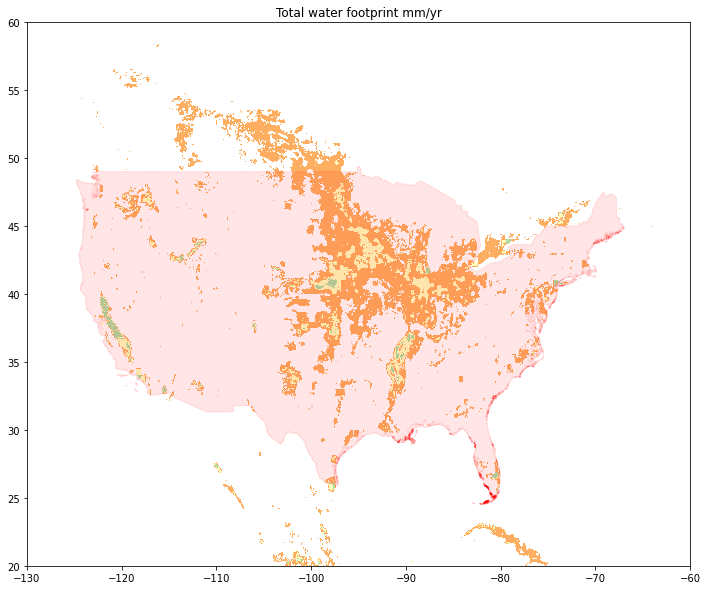

In [113]:
# Define the colors you want
cmap = ListedColormap(["#ffffff", "#fdae61", "#ffffbf", "#abdda4"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 214, 429, 644, 858], 5)

with rio.open(path + 'wf_tot_mmyr/hdr.adf') as src:
    dat = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    ax.set_ylim((20,60))
    ax.set_xlim((-130,-60))
    rio.plot.show(dat, norm=norm, cmap=cmap, ax=ax, transform=src.transform)
    gadm_usa.plot(ax=ax, color='red', alpha=.1, edgecolor='red')
    ax.set_title('Total water footprint mm/yr')

## Zonal stats to calculate total water footprint within US

The original raster has the information in mm/yr and the valye has been estimated by dividing the water footprint in one pixel by the area (1000*1000)m2.


In [75]:
src = rio.open(path + "wf_tot_mmyr/hdr.adf")
src.shape

(1668, 4320)

In [77]:
src.nodata

-3.4028234663852886e+38

In [87]:
src = rio.open(path + "wf_tot_mmyr/hdr.adf")
print('shape:',src.shape)
print('noData:',src.nodata)

image_read = src.read(1)
src_masked = numpy.ma.masked_array(image_read, mask=(image_read == src.nodata))

print(f'GLOBAL Total sum excluding no data: {src_masked.sum()} mm/yr')
print(f'GLOBAL Total sum excluding no data: {src_masked.sum()*0.001} m3/yr')

shape: (1668, 4320)
noData: -3.4028234663852886e+38
GLOBAL Total sum excluding no data: 111987304.0 mm/yr
GLOBAL Total sum excluding no data: 111987.304 m3/yr


In [102]:
#rasterise the gadm geometry

!gdal_rasterize -l gadm36_USA_0 -burn 1.0 -tr 0.08333334 0.08333334 -a_nodata 0.0 -te -179.99166665 -55.902229309 180.00836215 83.097781811 -ot Float32 -of GTiff $path'gadm36_USA_0.shp' $path'gadm36_USA_0.tif'

0...10...20...30...40...50...60...70...80...90...100 - done.


In [106]:
!gdalinfo $path+'gadm36_USA_0.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/+gadm36_USA_0.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666650000013,83.097781811000004)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916667,  83.0977818) (179d59'30.00"W, 83d 5'52.01"N)
Lower Left  (-179.9916667, -55.9022293) (179d59'30.00"W, 55d54' 8.03"S)
Uppe

In [119]:
!gdalinfo $path'/wf_tot_mmyr/hdr.adf'

Driver: AIG/Arc/Info Binary Grid
Files: ../../datasets/raw/wf/QA//wf_tot_mmyr
       ../../datasets/raw/wf/QA//wf_tot_mmyr/w001001.adf
       ../../datasets/raw/wf/QA//wf_tot_mmyr/dblbnd.adf
       ../../datasets/raw/wf/QA//wf_tot_mmyr/sta.adf
       ../../datasets/raw/wf/QA//wf_tot_mmyr/prj.adf
       ../../datasets/raw/wf/QA//wf_tot_mmyr/metadata.xml
       ../../datasets/raw/wf/QA//wf_tot_mmyr/w001001x.adf
       ../../datasets/raw/wf/QA//wf_tot_mmyr/hdr.adf
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["

In [128]:
!gdal_calc.py --calc "(A!=-3.40282e+38)*A" --format GTiff --type Float32 --NoDataValue 0.0 -A $path"/wf_tot_mmyr/hdr.adf" --A_band 1 --outfile $path'hdr_nodata_0.tif'

0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 

88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 88.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 

In [129]:
!gdalinfo $path'hdr_nodata_0.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/hdr_nodata_0.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666649999985,83.097781810917979)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916666,  83.0977818) (179d59'30.00"W, 83d 5'52.01"N)
Lower Left  (-179.9916666, -55.9022293) (179d59'30.00"W, 55d54' 8.03"S)
Upper

In [133]:
!gdal_calc.py --calc "A*B" --format GTiff --type Float32 --NoDataValue 0.0 -A $path'gadm36_USA_0.tif' --A_band 1 -B $path'hdr_nodata_0.tif' --outfile $path'usa_tot_wf.tif'

0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13

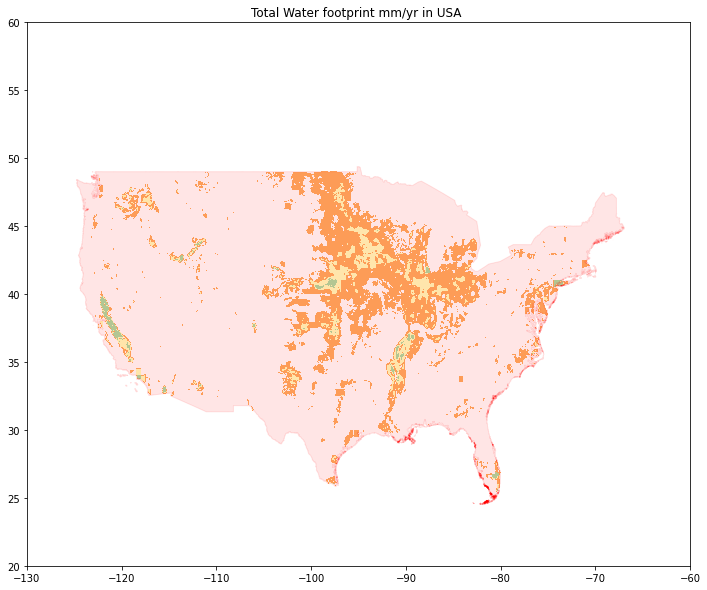

In [134]:
# Define the colors you want
cmap = ListedColormap(["#ffffff", "#fdae61", "#ffffbf", "#abdda4"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 214, 429, 644, 858], 5)

with rio.open(path + 'usa_tot_wf.tif') as src:
    dat = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    ax.set_ylim((20,60))
    ax.set_xlim((-130,-60))
    rio.plot.show(dat, norm=norm, cmap=cmap, ax=ax, transform=src.transform)
    gadm_usa.plot(ax=ax, color='red', alpha=.1, edgecolor='red')
    ax.set_title('Total Water footprint mm/yr in USA ')

In [135]:
#explore output for no data
!gdalinfo $path'usa_tot_wf.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/usa_tot_wf.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666650000013,83.097781811000004)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916667,  83.0977818) (179d59'30.00"W, 83d 5'52.01"N)
Lower Left  (-179.9916667, -55.9022293) (179d59'30.00"W, 55d54' 8.03"S)
Upper R

In [136]:
src_usa = rio.open(path + "usa_tot_wf.tif")
print('shape:',src_usa.shape)
print('noData:',src_usa.nodata)

image_read_usa = src_usa.read(1)
src_masked_usa = numpy.ma.masked_array(image_read_usa, mask=(image_read == src_usa.nodata))

print(f'GLOBAL Total sum excluding no data: {src_masked_usa.sum()} mm/yr')
print(f'GLOBAL Total sum excluding no data: {src_masked_usa.sum()*0.001} m3/yr')

shape: (1668, 4320)
noData: 0.0
GLOBAL Total sum excluding no data: 13675209.0 mm/yr
GLOBAL Total sum excluding no data: 13675.209 m3/yr


The values obtained above are calculated with the zonal statistics for the entire USA using the gadm level 0 boundary, with no simplification, and without multiplying by the pixel area in m2. The value obtained is directly transformed from mm/yr to m3/yr by mutiplying by 0.001.

Now we are going to obtain the value by multiplying each pixel by its area in m2 (being the area around 10km*10km):



In [141]:
!gdal_calc.py --calc "(A>0.1)*A*10000*10000" --format GTiff --type Float32 --NoDataValue 0.0 -A $path'usa_tot_wf.tif' --A_band 1 --outfile $path'usa_tot_wf_area.tif'

0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13

In [142]:
#explore output for no data
!gdalinfo $path'usa_tot_wf_area.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/usa_tot_wf_area.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666650000013,83.097781811000004)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916667,  83.0977818) (179d59'30.00"W, 83d 5'52.01"N)
Lower Left  (-179.9916667, -55.9022293) (179d59'30.00"W, 55d54' 8.03"S)
Up

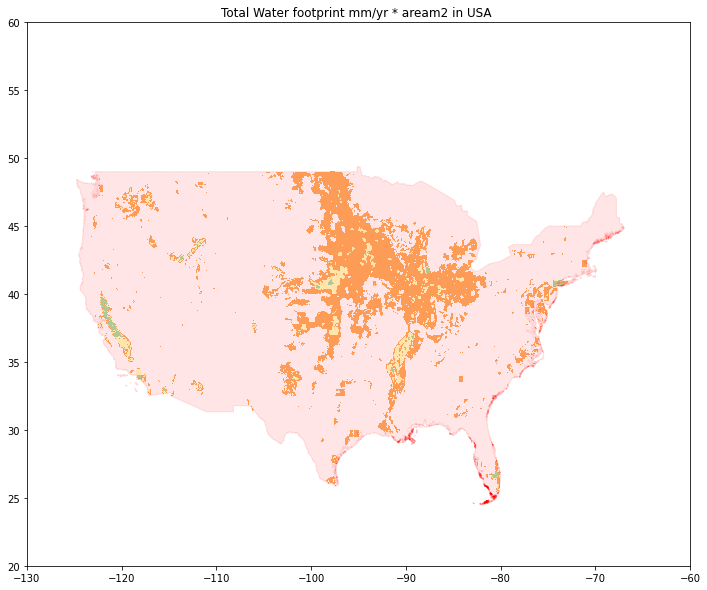

In [144]:
# Define the colors you want
cmap = ListedColormap(["#ffffff", "#fdae61", "#ffffbf", "#abdda4"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([10093132, 23580922297, 47151751462, 70722580627, 94293409792], 5)

with rio.open(path + 'usa_tot_wf_area.tif') as src:
    dat = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    ax.set_ylim((20,60))
    ax.set_xlim((-130,-60))
    rio.plot.show(dat, norm=norm, cmap=cmap, ax=ax, transform=src.transform)
    gadm_usa.plot(ax=ax, color='red', alpha=.1, edgecolor='red')
    ax.set_title('Total Water footprint mm/yr * aream2 in USA ')

In [148]:
src_usa_area = rio.open(path + "usa_tot_wf_area.tif")
print('shape:',src_usa_area.shape)
print('noData:',src_usa_area.nodata)

image_read_usa_area = src_usa_area.read(1)
src_masked_usa_area = numpy.ma.masked_array(image_read_usa_area, mask=(image_read == src_usa_area.nodata))

print(f'GLOBAL Total sum excluding no data: {src_masked_usa_area.sum()} mm/yr')
print(f'GLOBAL Total sum excluding no data: {src_masked_usa_area.sum()*0.001/1000000000} m3/yr')

shape: (1668, 4320)
noData: 0.0
GLOBAL Total sum excluding no data: 1367447391174656.0 mm/yr
GLOBAL Total sum excluding no data: 1367.447391174656 m3/yr


Based on this link (https://www.waterfootprint.org/media/downloads/Report50-NationalWaterFootprints-Vol1.pdf) the total value of water footprint in USA was: 1053 Mm3/yr, and the value calculated above is 1367.447391174656 Mm3/yr.


In [149]:
#compute difference between calculated value and value provided in the paper.

value = 1053 
value_es = round(1367.447391174656)

difference_abs = value - value_es
print(f'absolute difference: {difference_abs}')

difference_rel = (value-value_es)/value
print(f'relative difference: {difference_rel}')

absolute difference: -314
relative difference: -0.2981956315289649


We can asume that this difference is due to differences in admin area boundaries. 

### Calculate toal water footprint for india:

Calculate total water footprint for india so we can compare with value provided in the paper.

In [150]:
gadm_ind = gpd.read_file(path+'gadm36_IND_0.shp')
gadm_ind.head()

,GID_0,NAME_0,geometry
0,IND,India,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."


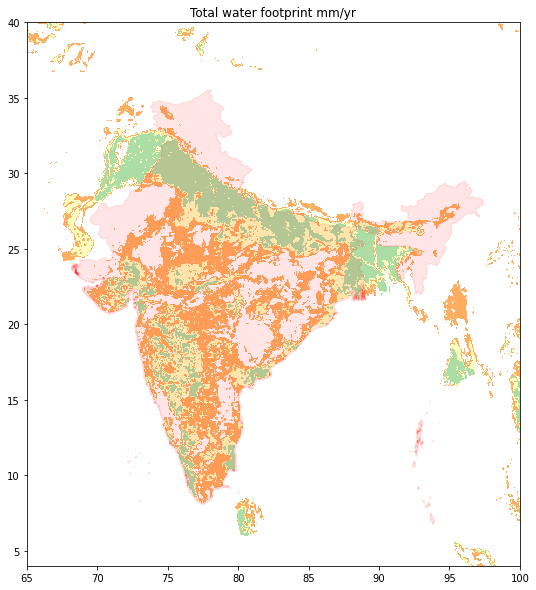

In [156]:
# Define the colors you want
cmap = ListedColormap(["#ffffff", "#fdae61", "#ffffbf", "#abdda4"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 214, 429, 644, 858], 5)

with rio.open(path + 'wf_tot_mmyr/hdr.adf') as src:
    dat = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    ax.set_ylim((4,40))
    ax.set_xlim((65,100))
    rio.plot.show(dat, norm=norm, cmap=cmap, ax=ax, transform=src.transform)
    gadm_ind.plot(ax=ax, color='red', alpha=.1, edgecolor='red')
    ax.set_title('Total water footprint mm/yr')

In [157]:
## multiply raster by area
!gdal_calc.py --calc "A*10000*10000" --format GTiff --type Float32 --NoDataValue 0.0 -A $path'wf_tot_mmyr/hdr.adf' --A_band 1 --outfile $path'tot_wf_mmyr_area.tif'

<string>:1: RuntimeWarning: overflow encountered in multiply
/opt/conda/lib/python3.8/site-packages/osgeo/utils/gdal_calc.py:367: RuntimeWarning: invalid value encountered in multiply
  myResult = ((1 * (myNDVs == 0)) * myResult) + (myOutNDV * myNDVs)


0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 

89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 

In [158]:
!gdalinfo $path'tot_wf_mmyr_area.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/tot_wf_mmyr_area.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666649999985,83.097781810917979)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916666,  83.0977818) (179d59'30.00"W, 83d 5'52.01"N)
Lower Left  (-179.9916666, -55.9022293) (179d59'30.00"W, 55d54' 8.03"S)
U

In [159]:
# rasterize india shape for cliping data
!gdal_rasterize -l gadm36_IND_0 -burn 1.0 -tr 0.08333334 0.08333334 -a_nodata 0.0 -te -179.99166665 -55.902229309 180.00836215 83.097781811 -ot Float32 -of GTiff $path'gadm36_IND_0.shp' $path'gadm36_IND_0.tif'

0...10...20...30...40...50...60...70...80...90...100 - done.


In [160]:
!gdalinfo $path'gadm36_IND_0.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/gadm36_IND_0.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666650000013,83.097781811000004)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916667,  83.0977818) (179d59'30.00"W, 83d 5'52.01"N)
Lower Left  (-179.9916667, -55.9022293) (179d59'30.00"W, 55d54' 8.03"S)
Upper

In [161]:
#multiply by wft
!gdal_calc.py --calc "A*B" --format GTiff --type Float32 --NoDataValue 0.0 -A $path'gadm36_IND_0.tif' --A_band 1 -B $path'tot_wf_mmyr_area.tif' --outfile $path'IND_tot_wf_mmyr_area.tif'

0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13

In [162]:
!gdalinfo $path'IND_tot_wf_mmyr_area.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/IND_tot_wf_mmyr_area.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666650000013,83.097781811000004)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916667,  83.0977818) (179d59'30.00"W, 83d 5'52.01"N)
Lower Left  (-179.9916667, -55.9022293) (179d59'30.00"W, 55d54' 8.03"

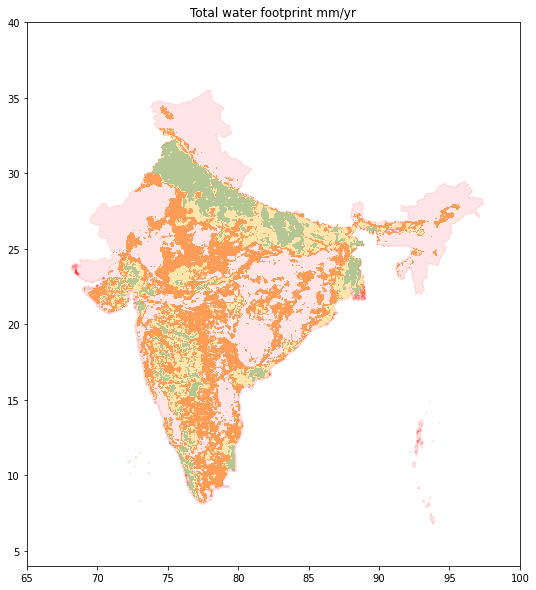

In [164]:
# Define the colors you want
cmap = ListedColormap(["#ffffff", "#fdae61", "#ffffbf", "#abdda4"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([10093132, 23580922297, 47151751462, 70722580627, 94293409792], 5)

with rio.open(path + 'IND_tot_wf_mmyr_area.tif') as src:
    dat = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    ax.set_ylim((4,40))
    ax.set_xlim((65,100))
    rio.plot.show(dat, norm=norm, cmap=cmap, ax=ax, transform=src.transform)
    gadm_ind.plot(ax=ax, color='red', alpha=.1, edgecolor='red')
    ax.set_title('Total water footprint mm/yr')

In [172]:
src_india_area = rio.open(path + "IND_tot_wf_mmyr_area.tif")
print('shape:',src_india_area.shape)
print('noData:',src_india_area.nodata)

src_india_area_array = src_india_area.read()
#remove nans that appear outside boundary for extent
src_india_area_array_nonan = src_india_area_array[~numpy.isnan(src_india_area_array)]

print(f'GLOBAL Total sum excluding no data: {src_india_area_array_nonan.sum()} mm/yr')
print(f'GLOBAL Total sum excluding no data: {src_india_area_array_nonan.sum()*0.001/1000000000} m3/yr')

shape: (1668, 4320)
noData: 0.0
GLOBAL Total sum excluding no data: 1406779091058688.0 mm/yr
GLOBAL Total sum excluding no data: 1406.779091058688 m3/yr


In [174]:
#compute difference
value = 1182 
value_es = round(1406.779091058688)

difference_abs = value - value_es
print(f'absolute difference: {difference_abs}')

difference_rel = (value-value_es)/value
print(f'relative difference: {difference_rel}')

absolute difference: -225
relative difference: -0.19035532994923857


As we have seen with the calculation performed in India, we are still working within the same kind of difference.

### Compute total blue water footprint in india:

Lets compute now thetotal blue water footprint to compare the result to the one shown on the report: https://www.waterfootprint.org/media/downloads/Report50-NationalWaterFootprints-Vol1.pdf

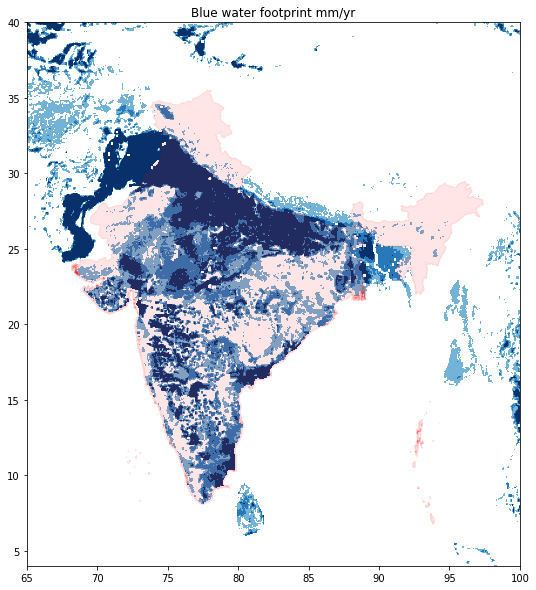

In [179]:


# Define the colors you want
cmap = ListedColormap(["#ffffff", "#73b3d8", "#2879b9", "#08306b"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 10, 50, 115, 150], 5)

with rio.open(path + 'wf_bltot_mmyr/hdr.adf') as src:
    dat = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    ax.set_ylim((4,40))
    ax.set_xlim((65,100))
    rio.plot.show(dat, norm=norm, cmap=cmap, ax=ax, transform=src.transform)
    gadm_ind.plot(ax=ax, color='red', alpha=.1, edgecolor='red')
    ax.set_title('Blue water footprint mm/yr')

In [180]:
#get the total blue water footprint per area
!gdal_calc.py --calc "A*10000*10000" --format GTiff --type Float32 --NoDataValue 0.0 -A $path'wf_bltot_mmyr/hdr.adf' --A_band 1 --outfile $path'bl_wf_mmyr_area.tif'

<string>:1: RuntimeWarning: overflow encountered in multiply
/opt/conda/lib/python3.8/site-packages/osgeo/utils/gdal_calc.py:367: RuntimeWarning: invalid value encountered in multiply
  myResult = ((1 * (myNDVs == 0)) * myResult) + (myOutNDV * myNDVs)


0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 

89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 91.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 92.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 93.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 

In [181]:
!gdalinfo $path'bl_wf_mmyr_area.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/bl_wf_mmyr_area.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666649999985,83.088344470000010)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916666,  83.0883445) (179d59'30.00"W, 83d 5'18.04"N)
Lower Left  (-179.9916666, -55.9116667) (179d59'30.00"W, 55d54'42.00"S)
Up

In [182]:
#get the area in india
!gdal_calc.py --calc "A*B" --format GTiff --type Float32 --NoDataValue 0.0 -A $path'gadm36_IND_0.tif' --A_band 1 -B $path'bl_wf_mmyr_area.tif' --outfile $path'IND_bl_wf_mmyr_area.tif'

0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 6.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 7.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 8.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 10.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 11.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 12.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13.. 13

In [183]:
!gdalinfo $path'IND_bl_wf_mmyr_area.tif'

Driver: GTiff/GeoTIFF
Files: ../../datasets/raw/wf/QA/IND_bl_wf_mmyr_area.tif
Size is 4320, 1668
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.991666650000013,83.097781811000004)
Pixel Size = (0.083333340000000,-0.083333340000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9916667,  83.0977818) (179d59'30.00"W, 83d 5'52.01"N)
Lower Left  (-179.9916667, -55.9022293) (179d59'30.00"W, 55d54' 8.03"S

In [184]:
src_india_area_bl = rio.open(path + "IND_bl_wf_mmyr_area.tif")
print('shape:',src_india_area_bl.shape)
print('noData:',src_india_area_bl.nodata)

src_india_area_array_bl = src_india_area_bl.read()
#remove nans that appear outside boundary for extent
src_india_area_array_nonan_bl = src_india_area_array_bl[~numpy.isnan(src_india_area_array_bl)]

print(f'GLOBAL Total sum excluding no data: {src_india_area_array_nonan_bl.sum()} mm/yr')
print(f'GLOBAL Total sum excluding no data: {src_india_area_array_nonan_bl.sum()*0.001/1000000000} m3/yr')

shape: (1668, 4320)
noData: 0.0
GLOBAL Total sum excluding no data: 304315713454080.0 mm/yr
GLOBAL Total sum excluding no data: 304.31571345408 m3/yr


In [185]:


#compute difference
value = 243 
value_es = round(304.31571345408)

difference_abs = value - value_es
print(f'absolute difference: {difference_abs}')

difference_rel = (value-value_es)/value
print(f'relative difference: {difference_rel}')

absolute difference: -61
relative difference: -0.25102880658436216
